
# Project: Investigate a Dataset (tmdb-movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

1. What kinds of properties are associated with movies that have high revenues?
2. Which is the highest-grossing movie of all time?
3. what is the relation between popularity and vote_count?
4. The top 5 directors made highly rated films? 
5. Does the realsing date affects movie's revenues?
6. what is the most popular generes?


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# drop columns that won't be useful in answering the previous questions.
df.drop(['id','imdb_id','homepage','cast','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

In [5]:
#count null values in each columns 
df.isnull().sum(axis = 0)

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [6]:
# count number of duplicate rows
df.duplicated().sum()

1

In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000



### Data Cleaning 
##### 1. convert 'release_year' column type from object to datetime
##### 2. drop rows has null in any field or nulls 



In [8]:
# convert type of release_year column to datetype 
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df.dropna(axis=0, how="any",inplace=True)

In [10]:
df.drop_duplicates(inplace =True)

In [11]:
# genres column has values separated by '|', convert it to list 
df['genres']=df['genres'].apply(lambda x:x.split('|'))
df['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 9806, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

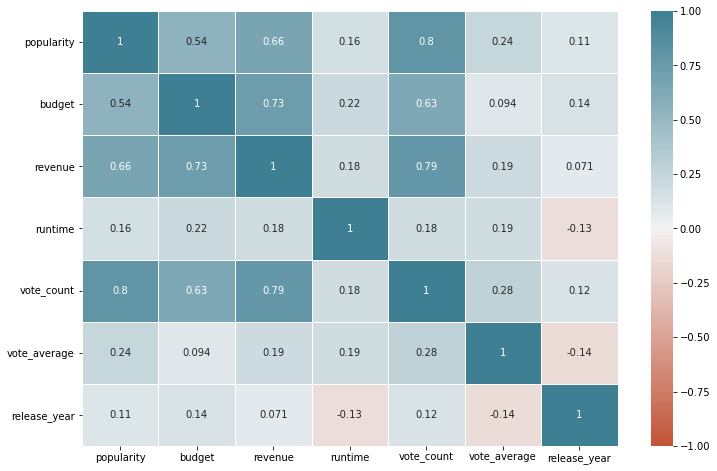

In [12]:
# calculate and visualize the correlation matrix to figure out factores affect the movie's revenues
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, linewidths=.5
)
ax.set_xticklabels( ax.get_xticklabels() );

from correlation matrix we figure out that:
 1. vote_count
 2. budget
 3. popularity 
 
affects revenu of movies 

### Research Question 2  (Which is the highest-grossing movie of all time? )

In [13]:
df[df['revenue'] == df['revenue'].max()]['original_title'].values[0]


'Avatar'

### Research Question 3 (what is the relation between popularity and vote_average?)

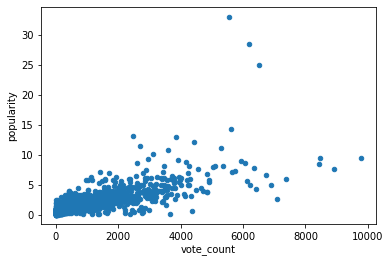

In [14]:
df.plot(x='vote_count',y='popularity',kind='scatter');

### Research Question 4 ( The top 5 directors made highly rated films?)

In [15]:
df.groupby('director')['vote_average'].mean().nlargest(5)

director
David Mallet                            8.7
Curt Morgan                             8.5
Martin Scorsese|Michael Henry Wilson    8.5
Saul Swimmer                            8.5
Jorge RamÃ­rez SuÃ¡rez                  8.4
Name: vote_average, dtype: float64

### Research Question 5 (Does the realsing date affects movie's revenues?)

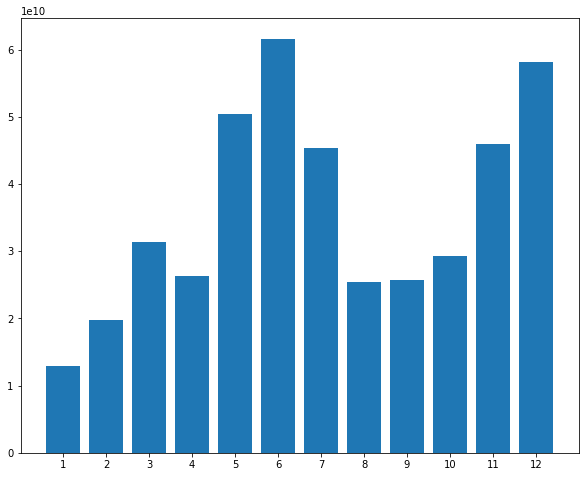

In [16]:
df['month'] = df['release_date'].dt.month
df_month = df.groupby('month')['revenue'].sum()

fig = plt.figure(figsize=(10, 8))
x = df_month.index
y = df_month.values
plt.xticks(x)
plt.bar(x, y)
plt.show()

from the graph we figure out tha month "Dec-june" has highest revenu 

### Research Question 6 (what is the most popular generes?)

In [17]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

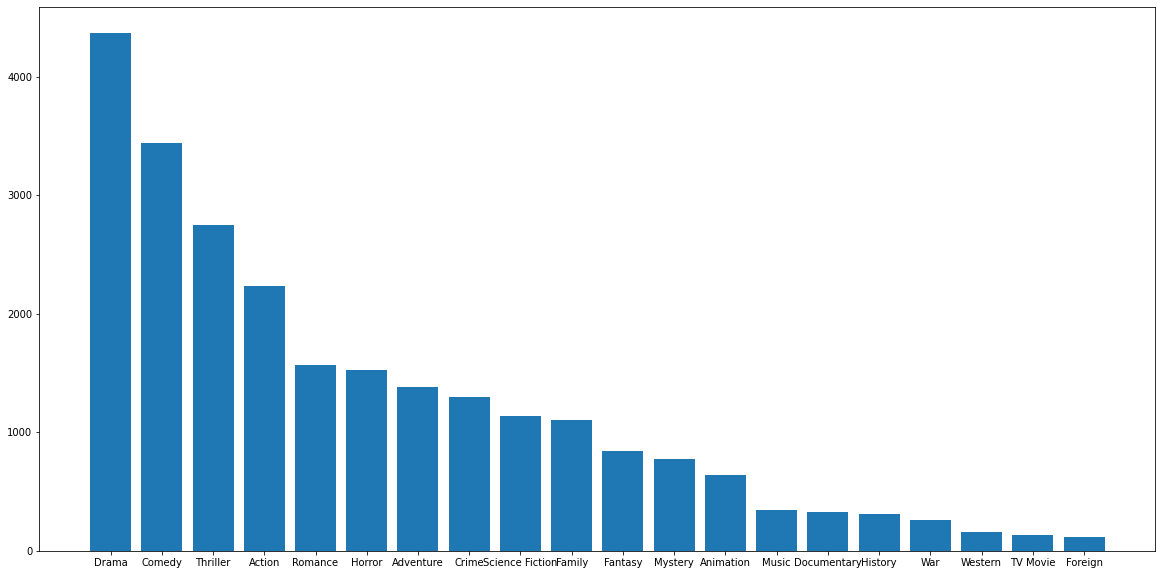

In [18]:
df_generes = to_1D(df["genres"]).value_counts()
fig = plt.figure(figsize=(20, 10))
x = df_generes.index
y = df_generes.values
plt.bar(x, y)
plt.show()

<a id='conclusions'></a>
## Conclusions

1. "vote_count,budget,popularity" affects movie's revenu
2. The highest-grossing movie of all time is the "Avatar" 
3. 'vote_count' and 'popularity has a positive correlation "increases with each other"
4. movies released during December and june has highest revenu
5. David Mallet - Curt Morgan - Martin Scorsese|Michael Henry Wilson - Saul Swimmer - Jorge RamÃ­rez SuÃ¡rez    
are the directors made highly rated films
6. Drama and comedy are the most popular generes
